#**Análise Rotatividade de Clientes de Telecomunicações**

A base de dados possui informações sobre:

- Clientes que saíram no último mês – a coluna é chamada de Churn
- Serviços nos quais cada cliente se inscreveu – telefone, múltiplas linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico e streaming de TV e filmes
- Informações da conta do cliente – há quanto tempo ele é cliente, contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais
- Informações demográficas sobre clientes – sexo, faixa etária e se possuem companheiros e dependentes

A base de dados foi extraída do Kaggle pelo seguinte link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## **Dicionário de Dados:**

- customerID = Código Identificador do cliente
- gender = Gênero do cliente (Homem, Mulher)
- SeniorCitizen = Se o cliente é idoso (1 para sim e 0 para não)
- Partner = Se o cliente tem parceiro (Sim, Não)
- Dependents = Se o cliente tem dependentes (Sim, Não)
- tenure = Número de meses que o cliente permaneceu na empresa
- PhoneService = Se o cliente possui serviço telefônico ou não (Sim, Não)
- MultipleLines = Se o cliente tem várias linhas (Sim, Não, Não há serviço telefônico)
- InternetService = Provedor de serviços de Internet do cliente (DSL, Fibra óptica, Não)
- OnlineSecurity = Se o cliente tem segurança online (Sim, Não, Não há serviço de internet)
- OnlineBackup = Se o cliente possui backup online (Sim, Não, Sem serviço de internet)
- DeviceProtection = Se o cliente possui proteção de dispositivo (Sim, Não, Sem serviço de internet)
- TechSupport = Se o cliente tem suporte técnico (Sim, Não, Sem serviço de internet)
- StreamingTV = Se o cliente possui streaming de TV (Sim, Não, Sem serviço de internet)
- StreamingMovies = Se o cliente possui streaming de filme(Sim, Não, Não há serviço de internet)
- Contract = O prazo do contrato do cliente (mês a mês, um ano, dois anos)
- PaperlessBilling = Se o cliente tem cobrança sem papel(Sim, Não)
- PaymentMethod = A forma de pagamento do cliente (cheque eletrônico, cheque enviado pelo correio, transferência bancária)
- MonthlyCharges = O valor cobrado do cliente mensalmente
- TotalCharges = O valor total cobrado do cliente
- Churn = Se o cliente cancelou (Sim ou Não)

##**Introdução**

Com essa base vamos analisar o perfil das pessoas que estão cancelando os serviços e tentar identificar qual é esse público.

- Comparar cancelamento x fx de idade, genero, se é idoso
- Comparar cancelamento x valor e prazo de contrato (entender se são novos clientes ou antigos que mais estão cancelando)
- Comparar cancelamento x valor cobrado do cliente mensalmente e valor total cobrado do cliente



## **Importando bibliotecas e base de dados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')

## **Análise Exploratória dos dados**


###Vamos analisar a base, nome das colunas, tipo e se possui valores nulos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Podemos avaliar que temos uma base sem valores nulos, com 7.043 observações e em sua maioria com informações do tipo texto, seguidas por inteiros e decimais.

###Visualização das 10 primeiras informações do Dataframe

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Comparativo entre Churn e Gênero

In [3]:
comparativo_genero = df[['Churn', 'gender']].value_counts().reset_index(name='count')
print(comparativo_genero)

  Churn  gender  count
0    No    Male   2625
1    No  Female   2549
2   Yes  Female    939
3   Yes    Male    930


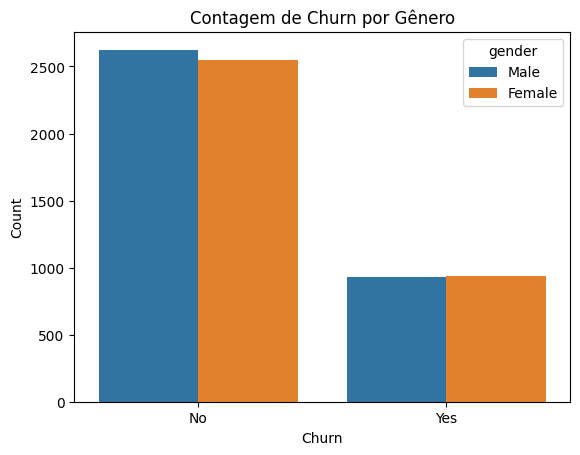

In [6]:
#criando o gráfico
sns.barplot(x='Churn', y='count', hue='gender', data=comparativo_genero)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Contagem de Churn por Gênero')
plt.show()

In [14]:
display(comparativo_genero)

,Churn,gender,count
0,No,Male,2625
1,No,Female,2549
2,Yes,Female,939
3,Yes,Male,930


Com esse gráfico e com a tabela, podemos analisar que não há uma discrepância significativa na taxa de churn entre os gêneros, as quantidades para ambos estão bem próximas.

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
perc_churn = df['Churn'].value_counts(normalize = True)

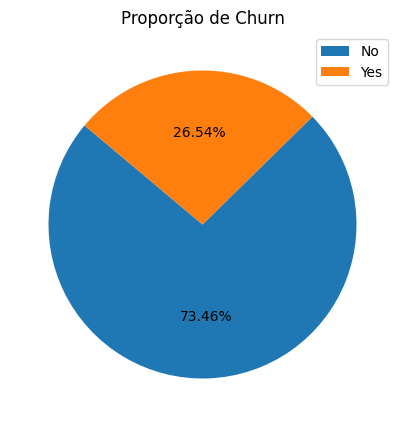

In [9]:
#criando o gráfico
plt.figure(figsize=(5, 5))
plt.pie(perc_churn, autopct='%.2f%%', startangle=140)
plt.title('Proporção de Churn')
plt.legend(perc_churn.index, loc="best")
plt.show()

Com o Gráfico proporção de Churn, podemos visualizar que é bem representativo o percentual de perda dos clientes, 26,54% é uma perda considerável e gera um alerta.